In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
#df=pd.read_excel('restaurants.xlsx')

In [2]:
#read data
df = pd.read_excel('Main_analysis.xlsx')

In [3]:
#set columns and rows to display
#pd.set_option('display.max_columns',40,'display.max_rows',40)

In [4]:
#fit notebook cell to browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

<h1>DATA CLEAN

In [5]:
#remove asia miles
asia_miles_index = df[df['food_type'].str.contains("eligible transactions")].index
df= df.drop(asia_miles_index)
df = df.reset_index()
df = df.drop('index',axis=1)

In [6]:
#drop duplicate entries with same name and location
df.drop_duplicates(subset=['name', 'location'], keep='last',inplace = True)

In [7]:
#change columns to float type
df['happy'] = df['happy'].astype(float)
df['sad'] = df['sad'].astype(float)
df['bookmark'] = df['bookmark'].astype(float)

In [8]:
#insert additional column of pure numeric prices
df['price_int'] = df['price'].replace({"Below $50":25,"$51-100":75,"$101-200":150,"$201-400":300,"$401-800":600,"Above $801":1000})

In [9]:
#define locations
Places = ['Causeway Bay','Central',"Yuen Long","Tsuen Wan","Tsim Sha Tsui","Mong Kok"]

In [10]:
#give location type a number
location_model = OrdinalEncoder()
test = pd.DataFrame(location_model.fit_transform(df[['location']]))

df = pd.concat([df,test],axis=1,join='inner')
df = df.rename(columns={0:"location_int"})

In [11]:
#introduce happy vs sad column
df['happy_vs_sad'] = df['happy']/df['sad']
df['happy_vs_sad'] = np.where(df['happy_vs_sad'] == np.inf, df['happy'], df['happy_vs_sad'])


In [12]:
#df only has Japanese food left
df = df[df['food_type']=="Japanese"]

In [13]:
#find number of payment and facilities
df['num_payment'] = df['pay_list'].str.count(',')+1
df['num_facility'] = df['other_facility'].str.count(',')+1

In [14]:
#get list of payment methods
df['payment_methods'] = df['pay_list'].str.split(',')
df.reset_index(inplace=True, drop = True)

In [15]:
#categorically split payment methods
one_hot = pd.get_dummies(df['payment_methods'].apply(pd.Series).stack()).sum(level=0)
df = df.merge(one_hot,how='outer',left_index = True, right_index=True)

In [16]:
#group locations to their respective district
def district(x):
    if x == "Causeway Bay" or x == "Central":
        return "HK"
    if x == "Yuen Long" or x == "Tsuen Wan":
        return "NT"
    else:
        return "KL"
    
df['location'] = df['location'].apply(lambda x: district(x))

In [17]:
#prepare dataframe for other facilities
df_fac=df[['name','bookmark','happy','location','taste','decor','service','hygiene','value','overall','happy_vs_sad','num_facility','other_facility']]
df_fac=df[df_fac['location']=='HK']
df_fac.fillna(0)
df_fac=df_fac[df_fac['other_facility']!=0]
df_fac['facilities'] = df_fac['other_facility'].str.split(',')
df_fac.reset_index(inplace=True, drop = True)
one_hot = pd.get_dummies(df_fac['facilities'].apply(pd.Series).stack()).sum(level=0)
df_fac = df_fac.merge(one_hot,how='outer',left_index = True, right_index=True)
#df_fac.describe()

<h1>USEFUL VISUALIZATION TOOLS

In [18]:
#bar chart
def bar_chart(column,x_axis = "variables",title = "graph of X",y_axis = "number of X"): #draws bar chart, input one array
    x = column.value_counts(sort=False).index
    y = column.value_counts(sort=False)

    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.bar(x, y, color ='orange',
            width = 0.4)

    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    plt.show()

In [19]:
#scatter plot
def scatter_graph(x,y,title): #draws a scatter graph, input two arrays
    m, b = np.polyfit(x, y, 1)
    print("y intercept: ", b, "slope: ",m)
    plt.scatter(x, y, alpha=0.7)
    try:
        plt.plot(x, m*x + b)
    except:
        None
        
    try:
        #plt.title("{} vs {}".format(y.name, x.name))
        plt.xlabel(x.name)
        plt.ylabel(y.name)
    except:
        #plt.title("Title")
        plt.xlabel("X-Axis")
        plt.ylabel("Y-Axis")
    plt.title(title)
    plt.show()
    

In [20]:
#draws a scatter graph with poly regression, input two arrays
def scatter_graph_2(x,y,title,size ):
    
    p2 = np.polyfit(x, y, 3)
    
    plt.scatter(x, y, alpha=0.7)
    
    xp=np.linspace(0,size,200)
    plt.plot(xp, np.polyval(p2,xp))
   
    try:
        #plt.title("{} vs {}".format(y.name, x.name))
        plt.xlabel(x.name)
        plt.ylabel(y.name)
    except:
        #plt.title("Title")
        plt.xlabel("X-Axis")
        plt.ylabel("Y-Axis")
    plt.title(title)
    plt.show()
    

In [21]:
def find_average(df): #returns sad, happy, bookmark, price_int
    print("Average sad is: ",df['sad'].mean())
    print("Average happy is: ",df['happy'].mean())
    print("Average bookmark is: ",df['bookmark'].mean())
    print("Average price is: ",df['price_int'].mean())
    print("------------------ \n")
    return df['sad'].mean(),df['happy'].mean(),df['bookmark'].mean(),df['price_int'].mean()

<h1> Analysis

<h2> Statistics

In [22]:
df.describe()

,bookmark,happy,sad,num_branch,num_seat,taste,decor,service,hygiene,value,...,Octopus,OpenRice Pay,Pay me,PayMe,Payme,Samsung Pay,UnionPay,Visa,WeChat Pay,微信支付 (國內)
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,...,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,12537.460606,222.024242,12.463636,2.424242,33.251515,3.742424,3.663636,3.630303,3.733333,3.345455,...,0.145062,0.083333,0.003086,0.003086,0.006173,0.003086,0.592593,0.796296,0.197531,0.003086
std,11268.156893,198.002301,18.449970,4.168417,57.056580,0.437963,0.479563,0.489702,0.442888,0.507147,...,0.352708,0.276813,0.055556,0.055556,0.078446,0.055556,0.492112,0.403374,0.398752,0.055556
min,384.000000,3.000000,0.000000,1.000000,0.000000,3.000000,2.000000,2.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4644.250000,76.000000,3.000000,1.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,10117.000000,149.500000,6.000000,1.000000,0.000000,4.000000,4.000000,4.000000,4.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,16127.250000,312.250000,14.750000,2.000000,50.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,86010.000000,1065.000000,123.000000,64.000000,360.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2>Location

In [23]:
#used in location popularity
df.groupby('location').describe()

bookmark                                                       \
            count          mean           std     min     25%      50%   
location                                                                 
HK          117.0  14415.188034   8701.468334  2129.0  8977.0  11815.0   
KL          111.0  17119.288288  14130.542042  2028.0  7713.5  12664.0   
NT          102.0   5397.490196   5525.806746   384.0  1946.0   3497.5   

                            happy              ... WeChat Pay      微信支付 (國內)  \
              75%      max  count        mean  ...        75%  max     count   
location                                       ...                             
HK        18321.0  45755.0  117.0  228.598291  ...        0.0  1.0     117.0   
KL        20940.0  86010.0  111.0  300.567568  ...        1.0  1.0     110.0   
NT         6987.5  30518.0  102.0  129.009804  ...        0.0  1.0      97.0   

                                                       
              mean       std  min  25%  50%  75%  max  
location                                               
HK        0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
KL        0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
NT        0.010309  0.101535  0.0  0.0  0.0  0.0  1.0  

[3 rows x 296 columns]

In [24]:
#filter only HK island for analysis
df = df[df['location'] == "HK"]

<h2>Price

In [25]:
df.loc[:,['bookmark','happy','overall','happy_vs_sad','price']].groupby(by='price').describe()

bookmark                                                          \
              count          mean           std      min       25%      50%   
price                                                                         
$101-200       30.0  10879.966667   6780.444307   2129.0   5383.50  10428.0   
$201-400       34.0  17823.470588   9509.739557   4633.0  11629.75  14786.5   
$401-800       16.0  15791.125000   6942.578866   6665.0  10633.75  14606.5   
$51-100        19.0  13761.105263  10000.204470   2416.0   7819.50  10741.0   
Above $801     17.0  11700.058824   4282.249445   3304.0  10119.00  11075.0   
Below $50       1.0  41160.000000           NaN  41160.0  41160.00  41160.0   

                              happy              ... overall        \
                 75%      max count        mean  ...     75%   max   
price                                            ...                 
$101-200    13746.00  27314.0  30.0  200.566667  ...   20.00  20.0   
$201-400    24987.00  45755.0  34.0  297.176471  ...   19.75  20.0   
$401-800    20305.25  28675.0  16.0  178.437500  ...   19.00  20.0   
$51-100     16571.50  38296.0  19.0  225.684211  ...   19.00  20.0   
Above $801  13017.00  24289.0  17.0  166.647059  ...   20.00  20.0   
Below $50   41160.00  41160.0   1.0  649.000000  ...   16.00  16.0   

           happy_vs_sad                                              \
                  count       mean        std        min        25%   
price                                                                 
$101-200           30.0  47.563184  54.804382   4.538462  14.050000   
$201-400           34.0  51.592000  63.860500   6.909091  17.500000   
$401-800           16.0  30.737995  20.273489   8.571429  15.848039   
$51-100            19.0  42.302650  68.041607   3.750000  12.475000   
Above $801         17.0  37.482529  36.417017   5.000000  14.333333   
Below $50           1.0  38.176471        NaN  38.176471  38.176471   

                                              
                  50%        75%         max  
price                                         
$101-200    27.550000  56.312500  266.000000  
$201-400    29.571429  55.687500  348.000000  
$401-800    28.500000  35.000000   77.666667  
$51-100     20.866667  36.277778  299.000000  
Above $801  24.000000  52.500000  138.250000  
Below $50   38.176471  38.176471   38.176471  

[6 rows x 32 columns]

<h2> Payment method

overall
             num_payment   overall
num_payment     1.000000  0.113215
overall         0.113215  1.000000


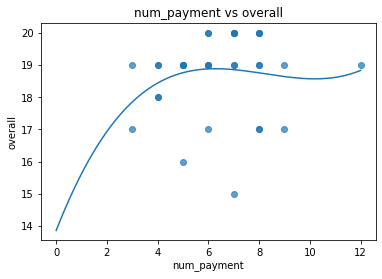

y intercept:  18.227622714148225 slope:  0.07459095283926795


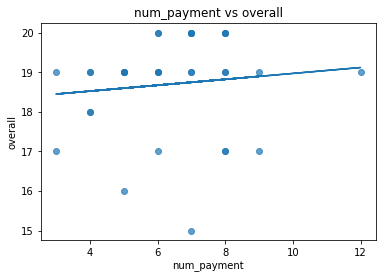

happy
             num_payment    happy
num_payment      1.00000  0.14243
happy            0.14243  1.00000


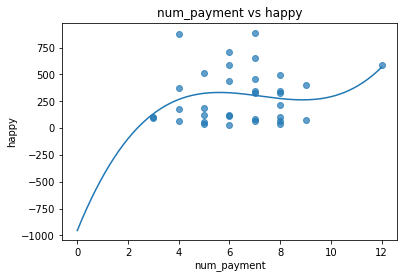

y intercept:  178.49711260827723 slope:  18.509624639076044


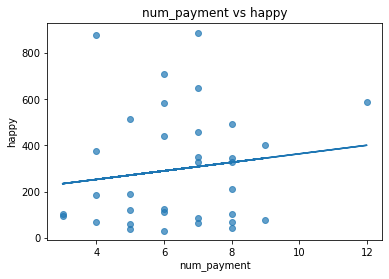

bookmark
             num_payment  bookmark
num_payment     1.000000 -0.104127
bookmark       -0.104127  1.000000


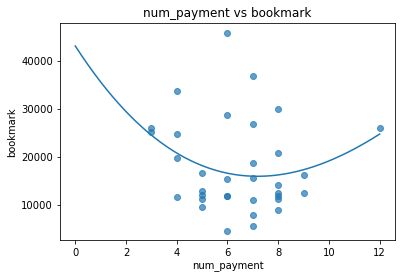

y intercept:  21122.351299326274 slope:  -514.5043310875838


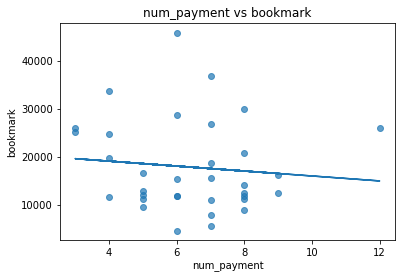

happy_vs_sad
              num_payment  happy_vs_sad
num_payment      1.000000      0.137451
happy_vs_sad     0.137451      1.000000


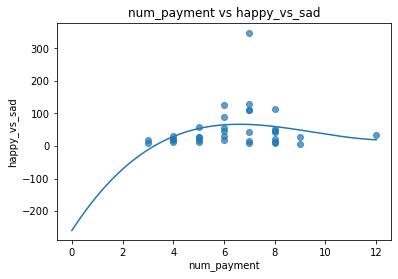

y intercept:  22.34945860756931 slope:  4.560763357293747


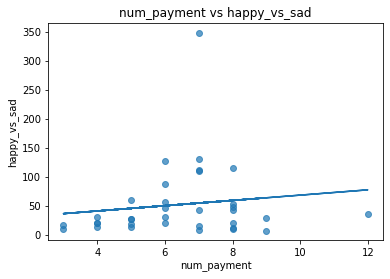

In [26]:
df_pay_200 = df.groupby('price',as_index=True).get_group('$201-400')
#df_pay_200.dropna(inplace=True)
df_pay_200.reset_index(inplace=True, drop = True)
for i in ['overall','happy','bookmark','happy_vs_sad']:
    print(i)
    print(df_pay_200[["num_payment",i]].corr())
    title = 'num_payment vs '+i
    scatter_graph_2(df_pay_200['num_payment'], df_pay_200[i], title,12)
    scatter_graph(df_pay_200['num_payment'], df_pay_200[i], title)
    plt.show()

In [27]:
arr_keep = ['name','price','food_type','location']

for i,j in list((df_pay_200.describe().iloc[1]>0.25).items()):
    if j:
        arr_keep.append(i)
df_pay_200 = df_pay_200[arr_keep]
df_pay_200.reset_index(inplace=True, drop = True)
df_pay_200.describe().iloc[1,-8:]

AE            0.441176
Alipay        0.705882
AlipayHK      0.735294
Cash          1.000000
Master        0.970588
UnionPay      0.764706
Visa          0.970588
WeChat Pay    0.294118
Name: mean, dtype: float64

<AxesSubplot:xlabel='price_int', ylabel='overall'>

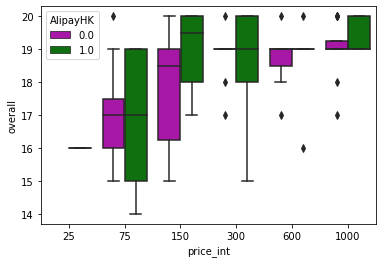

In [28]:
sns.boxplot(x="price_int", y="overall",
            hue="AlipayHK", palette=["m", "g"],
            data=df)

<h2> Number of seats

overall


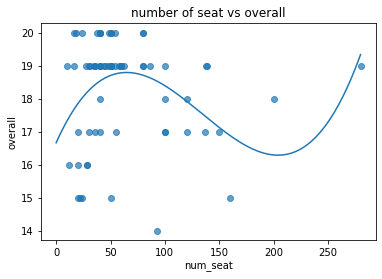

taste


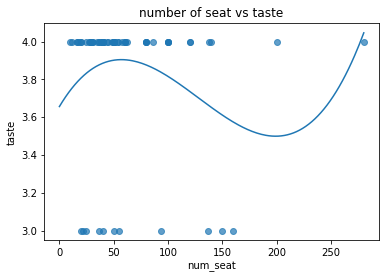

decor


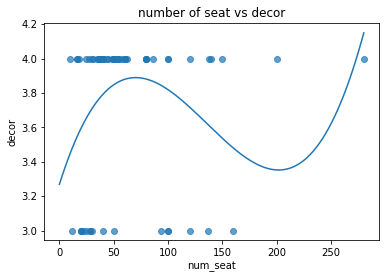

service


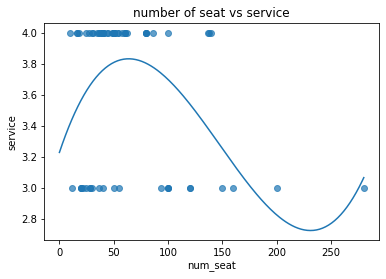

hygiene


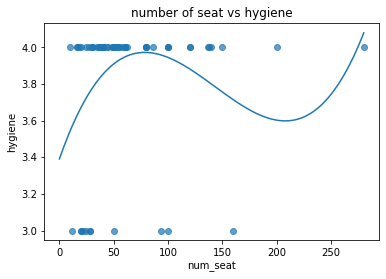

value


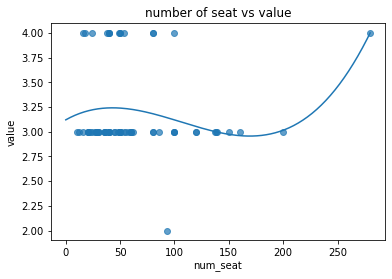

happy


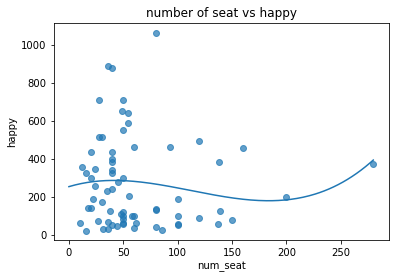

In [29]:
#analysis on effective number of seat can bring customer satisfaction
df_seat=df[df['num_seat'] != 0]
for i in ['overall','taste', 'decor', 'service',  'hygiene', 'value','happy']:
    print(i)
    title = 'number of seat vs '+i
    scatter_graph_2(df_seat['num_seat'],df_seat[i], title,280)
    

<h2> Other facilities

service


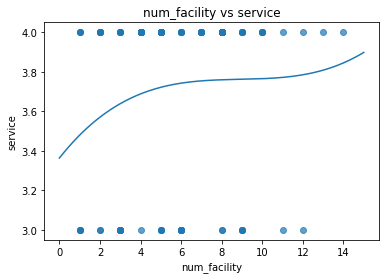

              num_facility   service
num_facility      1.000000  0.156625
service           0.156625  1.000000
value


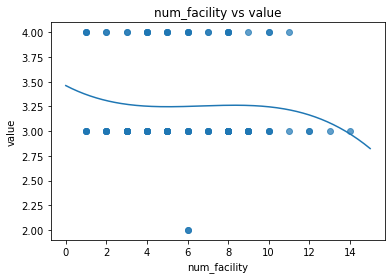

              num_facility     value
num_facility      1.000000 -0.069632
value            -0.069632  1.000000
overall


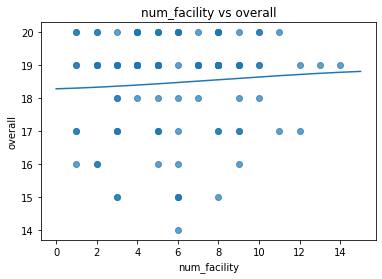

              num_facility   overall
num_facility      1.000000  0.076795
overall           0.076795  1.000000
happy


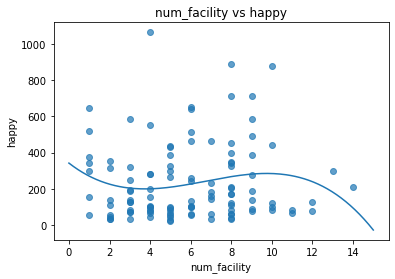

              num_facility     happy
num_facility      1.000000  0.056842
happy             0.056842  1.000000
bookmark


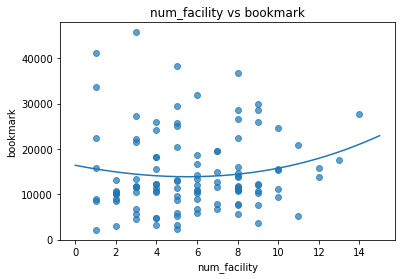

              num_facility  bookmark
num_facility      1.000000  0.054614
bookmark          0.054614  1.000000


In [30]:
# analysis on effect from num_facility to utility rating
df_fac.dropna(inplace=True)
for i in ['service','value','overall','happy','bookmark']: 
    print(i)
    title = 'num_facility vs '+i
    scatter_graph_2(df_fac['num_facility'], df_fac[i], title,15)
    print(df_fac[['num_facility',i]].corr())

In [31]:
# analysis on effect from specific facility
for j in list(df_fac.columns)[-21:]:
    print(j)
    grp=df_fac.groupby(j,as_index=True)
    for i in ['service','value','overall','happy','bookmark']:
        print('\n')
        
        print(grp.agg({i:'median'}))
        
    print('\n')
    

10% Service Charge


                    service
10% Service Charge         
0.0                     4.0
1.0                     4.0


                    value
10% Service Charge       
0.0                   4.0
1.0                   3.0


                    overall
10% Service Charge         
0.0                    19.5
1.0                    19.0


                    happy
10% Service Charge       
0.0                 205.0
1.0                 153.0


                    bookmark
10% Service Charge          
0.0                   6317.0
1.0                  12189.0


Accessible Environment


                        service
Accessible Environment         
0.0                         4.0
1.0                         3.0


                        value
Accessible Environment       
0.0                       3.0
1.0                       3.0


                        overall
Accessible Environment         
0.0                        19.0
1.0                        17.0


              

1.0               4.0


              value
Spot payment       
0.0             3.0
1.0             3.0


              overall
Spot payment         
0.0              19.0
1.0              19.0


              happy
Spot payment       
0.0           111.0
1.0           206.5


              bookmark
Spot payment          
0.0            11603.0
1.0            12050.5


TV Broadcast


              service
TV Broadcast         
0.0               4.0
1.0               4.0


              value
TV Broadcast       
0.0             3.0
1.0             3.0


              overall
TV Broadcast         
0.0              19.0
1.0              18.0


              happy
TV Broadcast       
0.0           148.5
1.0           466.0


              bookmark
TV Broadcast          
0.0            11718.0
1.0            19621.0


VIP Room


          service
VIP Room         
0.0           4.0
1.0           4.0


          value
VIP Room       
0.0         3.0
1.0         3.0


          overall
VIP Ro

<h2> Factors that affect overall scores


In [32]:
df.loc[:,['happy','sad','bookmark','taste','decor','service','hygiene','value','overall']].corr()

,happy,sad,bookmark,taste,decor,service,hygiene,value,overall
happy,1.000000,0.535698,0.611806,0.137468,-0.204869,-0.113701,-0.199764,0.022583,-0.100664
sad,0.535698,1.000000,0.548583,-0.327155,-0.546399,-0.520557,-0.498711,-0.363600,-0.618095
bookmark,0.611806,0.548583,1.000000,0.032874,-0.285625,-0.280944,-0.201409,-0.282978,-0.295455
taste,0.137468,-0.327155,0.032874,1.000000,0.335976,0.489227,0.420792,0.324379,0.670430
decor,-0.204869,-0.546399,-0.285625,0.335976,1.000000,0.668779,0.677795,0.243355,0.798594
service,-0.113701,-0.520557,-0.280944,0.489227,0.668779,1.000000,0.597022,0.330463,0.847975
hygiene,-0.199764,-0.498711,-0.201409,0.420792,0.677795,0.597022,1.000000,0.168410,0.752515
value,0.022583,-0.363600,-0.282978,0.324379,0.243355,0.330463,0.168410,1.000000,0.598299
overall,-0.100664,-0.618095,-0.295455,0.670430,0.798594,0.847975,0.752515,0.598299,1.000000
